## 1. 模型定义

### 1.1 深度循环神经网络

In [21]:
from torch import nn
from tqdm import *

class DRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(DRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) 
        # batch_first 为 True时output的tensor为（batch,seq,feature）,否则为（seq,batch,feature）
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # 初始化隐藏状态和细胞状态
        state = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        # 计算输出和最终隐藏状态
        output, _ = self.rnn(x, state)
        output = self.linear(output)
        return output

In [2]:
# 网络结构
model = DRNN(16, 16, 64, 2)
for name,parameters in model.named_parameters():
    print(name,':',parameters.size())

rnn.weight_ih_l0 : torch.Size([64, 16])
rnn.weight_hh_l0 : torch.Size([64, 64])
rnn.bias_ih_l0 : torch.Size([64])
rnn.bias_hh_l0 : torch.Size([64])
rnn.weight_ih_l1 : torch.Size([64, 64])
rnn.weight_hh_l1 : torch.Size([64, 64])
rnn.bias_ih_l1 : torch.Size([64])
rnn.bias_hh_l1 : torch.Size([64])
linear.weight : torch.Size([16, 64])
linear.bias : torch.Size([16])


### 1.2 双向循环神经网络

In [3]:
class BRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True) # bidirectional为True是双向
        self.linear = nn.Linear(hidden_size * 2, output_size)  # 双向网络，因此有双倍hidden_size
    
    def forward(self, x):
        # 初始化隐藏状态
        state = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size) # 需要双倍的隐藏层
        output, _ = self.rnn(x, state)
        output = self.linear(output)
        return output

In [4]:
# 网络结构
model = BRNN(16, 16, 64, 2)
for name,parameters in model.named_parameters():
    print(name,':',parameters.size())

rnn.weight_ih_l0 : torch.Size([64, 16])
rnn.weight_hh_l0 : torch.Size([64, 64])
rnn.bias_ih_l0 : torch.Size([64])
rnn.bias_hh_l0 : torch.Size([64])
rnn.weight_ih_l0_reverse : torch.Size([64, 16])
rnn.weight_hh_l0_reverse : torch.Size([64, 64])
rnn.bias_ih_l0_reverse : torch.Size([64])
rnn.bias_hh_l0_reverse : torch.Size([64])
rnn.weight_ih_l1 : torch.Size([64, 128])
rnn.weight_hh_l1 : torch.Size([64, 64])
rnn.bias_ih_l1 : torch.Size([64])
rnn.bias_hh_l1 : torch.Size([64])
rnn.weight_ih_l1_reverse : torch.Size([64, 128])
rnn.weight_hh_l1_reverse : torch.Size([64, 64])
rnn.bias_ih_l1_reverse : torch.Size([64])
rnn.bias_hh_l1_reverse : torch.Size([64])
linear.weight : torch.Size([16, 128])
linear.bias : torch.Size([16])


### 1.3 长短期记忆网络

In [5]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # LSTM
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output, _ = self.lstm(x)
        output = self.linear(output)
        return output

In [6]:
# 网络结构
model = LSTM(16, 16, 64, 2)
for name,parameters in model.named_parameters():
    print(name,':',parameters.size())

lstm.weight_ih_l0 : torch.Size([256, 16])
lstm.weight_hh_l0 : torch.Size([256, 64])
lstm.bias_ih_l0 : torch.Size([256])
lstm.bias_hh_l0 : torch.Size([256])
lstm.weight_ih_l1 : torch.Size([256, 64])
lstm.weight_hh_l1 : torch.Size([256, 64])
lstm.bias_ih_l1 : torch.Size([256])
lstm.bias_hh_l1 : torch.Size([256])
linear.weight : torch.Size([16, 64])
linear.bias : torch.Size([16])


### 1.4 门控循环单元

In [7]:
class GRU(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True) # GRU
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output, _ = self.gru(x)
        output = self.linear(output)
        return output

In [8]:
# 网络结构
model = GRU(16, 16, 64, 2)
for name,parameters in model.named_parameters():
    print(name,':',parameters.size())

gru.weight_ih_l0 : torch.Size([192, 16])
gru.weight_hh_l0 : torch.Size([192, 64])
gru.bias_ih_l0 : torch.Size([192])
gru.bias_hh_l0 : torch.Size([192])
gru.weight_ih_l1 : torch.Size([192, 64])
gru.weight_hh_l1 : torch.Size([192, 64])
gru.bias_ih_l1 : torch.Size([192])
gru.bias_hh_l1 : torch.Size([192])
linear.weight : torch.Size([16, 64])
linear.bias : torch.Size([16])


## 2. 模型实验

### 2.1 数据集加载

In [9]:
import pandas_datareader as pdr
dji = pdr.DataReader('^DJI', 'stooq')
dji

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-10,33671.54,33897.31,33591.99,33869.27,289863415.0
2023-02-09,34105.61,34252.57,33607.13,33699.88,352340883.0
2023-02-08,34132.90,34161.65,33899.79,33949.01,331798754.0
2023-02-07,33769.78,34240.00,33634.10,34156.69,362844008.0
2023-02-06,33874.44,33962.84,33683.58,33891.02,297051674.0
...,...,...,...,...,...
2018-02-20,25124.91,25179.01,24884.19,24964.75,421529658.0
2018-02-16,25165.94,25432.42,25149.26,25219.38,406774321.0
2018-02-15,25047.82,25203.95,24809.42,25200.37,416778260.0


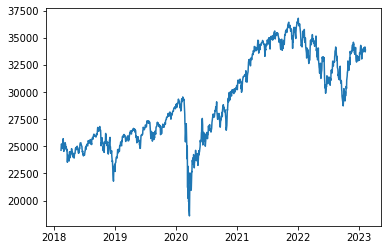

In [10]:
import matplotlib.pyplot as plt
plt.plot(dji['Close'])
plt.show()

In [22]:
import torch
from torch.utils.data import DataLoader, TensorDataset

num = len(dji)                           # 总数据量
x = torch.tensor(dji['Close'].to_list())  # 股价列表

x = (x - torch.mean(x)) / torch.std(x)  #对数据进行归一化

seq_len = 16                               # 预测序列长度
batch_size = 16                            # 设置批大小

X_feature = torch.zeros((num - seq_len, seq_len))      # 构建特征矩阵，num-seq_len行，seq_len列，初始值均为0
Y_label = torch.zeros((num - seq_len, seq_len))        # 构建标签矩阵，形状同特征矩阵
for i in range(seq_len):
    X_feature[:, i] = x[i: num - seq_len + i]    # 为特征矩阵赋值
    Y_label[:, i] = x[i+1: num - seq_len + i + 1]    # 为标签矩阵赋值

train_loader = DataLoader(TensorDataset(
    X_feature[:num-seq_len].unsqueeze(2), Y_label[:num-seq_len]),
    batch_size=batch_size, shuffle=True)  # 构建数据加载器

In [26]:
# 定义超参数
input_size = 1
output_size = 1
num_hiddens = 64
n_layers = 2
lr = 0.001


# 建立模型
model = DRNN(input_size, output_size, num_hiddens, n_layers)
criterion = nn.MSELoss(reduction='none')
trainer = torch.optim.Adam(model.parameters(), lr)

  5%|▌         | 1/20 [00:00<00:08,  2.30it/s]

Epoch 1: Validation loss = 0.0180


 10%|█         | 2/20 [00:00<00:07,  2.29it/s]

Epoch 2: Validation loss = 0.0083


 15%|█▌        | 3/20 [00:01<00:07,  2.29it/s]

Epoch 3: Validation loss = 0.0081


 20%|██        | 4/20 [00:01<00:06,  2.29it/s]

Epoch 4: Validation loss = 0.0079


 25%|██▌       | 5/20 [00:02<00:06,  2.29it/s]

Epoch 5: Validation loss = 0.0078


 30%|███       | 6/20 [00:02<00:06,  2.28it/s]

Epoch 6: Validation loss = 0.0077


 35%|███▌      | 7/20 [00:03<00:05,  2.27it/s]

Epoch 7: Validation loss = 0.0081


 40%|████      | 8/20 [00:03<00:05,  2.28it/s]

Epoch 8: Validation loss = 0.0080


 45%|████▌     | 9/20 [00:03<00:04,  2.28it/s]

Epoch 9: Validation loss = 0.0078


 50%|█████     | 10/20 [00:04<00:04,  2.25it/s]

Epoch 10: Validation loss = 0.0080


 55%|█████▌    | 11/20 [00:04<00:03,  2.25it/s]

Epoch 11: Validation loss = 0.0079


 60%|██████    | 12/20 [00:05<00:03,  2.25it/s]

Epoch 12: Validation loss = 0.0079


 65%|██████▌   | 13/20 [00:05<00:03,  2.27it/s]

Epoch 13: Validation loss = 0.0077


 70%|███████   | 14/20 [00:06<00:02,  2.25it/s]

Epoch 14: Validation loss = 0.0082


 75%|███████▌  | 15/20 [00:06<00:02,  2.26it/s]

Epoch 15: Validation loss = 0.0080


 80%|████████  | 16/20 [00:07<00:01,  2.25it/s]

Epoch 16: Validation loss = 0.0077


 85%|████████▌ | 17/20 [00:07<00:01,  2.26it/s]

Epoch 17: Validation loss = 0.0078


 90%|█████████ | 18/20 [00:07<00:00,  2.28it/s]

Epoch 18: Validation loss = 0.0076


 95%|█████████▌| 19/20 [00:08<00:00,  2.28it/s]

Epoch 19: Validation loss = 0.0076


100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

Epoch 20: Validation loss = 0.0076


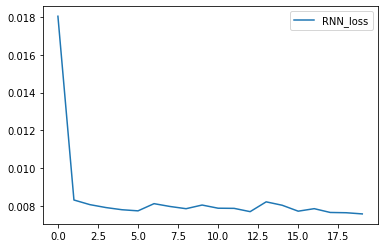

In [27]:
# 训练轮次
num_epochs = 20
rnn_loss_history = []

for epoch in tqdm(range(num_epochs)):
    # 批量训练
    for X, Y in train_loader:
        trainer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred.squeeze(), Y.squeeze())
        loss.sum().backward()
        trainer.step()
    # 输出损失
    with torch.no_grad():
        total_loss = 0
        for X, Y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred.squeeze(), Y.squeeze())
            total_loss += loss.sum()/loss.numel()
        avg_loss = total_loss / len(train_loader)
        print(f'Epoch {epoch+1}: Validation loss = {avg_loss:.4f}')
        rnn_loss_history.append(avg_loss)
    
# 绘制损失曲线图
import matplotlib.pyplot as plt
# plt.plot(loss_history, label='loss')
plt.plot(rnn_loss_history, label='RNN_loss')
plt.legend()
plt.show()

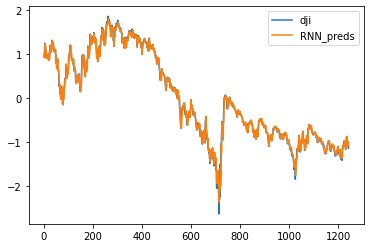

In [30]:
rnn_preds = model(X_feature.unsqueeze(2))
rnn_preds.squeeze()
time = torch.arange(1, num+1, dtype= torch.float32)  # 时间轴

plt.plot(time[:num-seq_len], x[seq_len:num], label='dji')
# plt.plot(time[:num-seq_len], preds.detach().numpy(), label='preds')
plt.plot(time[:num-seq_len], rnn_preds[:,seq_len-1].detach(), label='RNN_preds')
plt.legend()
plt.show()

## 3 效果对比 

In [32]:
# 定义超参数
input_size = 1
output_size = 1
num_hiddens = 64
n_layers = 2
lr = 0.001


# 建立模型
model_name = ['DRNN', 'BRNN', 'LSTM', 'GRU']
drnn = DRNN(input_size, output_size, num_hiddens, n_layers)
brnn = BRNN(input_size, output_size, num_hiddens, n_layers)
lstm = LSTM(input_size, output_size, num_hiddens, n_layers)
gru = GRU(input_size, output_size, num_hiddens, n_layers)
models = [drnn, brnn, lstm, gru]

opts = [torch.optim.Adam(drnn.parameters(), lr), 
            torch.optim.Adam(brnn.parameters(), lr), 
            torch.optim.Adam(lstm.parameters(), lr), 
            torch.optim.Adam(gru.parameters(), lr)]
criterion = nn.MSELoss(reduction='none')

num_epochs = 20
rnn_loss_history = []
lr = 0.1
for epoch in tqdm(range(num_epochs)):
    # 批量训练
    for X, Y in train_loader:
        for index, model, optimizer in zip(range(len(models)), models, opts):
            y_pred = model(X)
            loss = criterion(y_pred.squeeze(), Y.squeeze())
            trainer.zero_grad()
            loss.sum().backward()
            trainer.step()

100%|██████████| 20/20 [00:59<00:00,  2.95s/it]


In [33]:
for i in range(4):
    rnn_preds = models[i](X_feature.unsqueeze(2))
    bias = torch.sum(x[seq_len:num] - rnn_preds[:,seq_len-1].detach().numpy())
    print ('{} bias : {}'.format(model_name[i],str(bias)))

DRNN bias : tensor(125995.9453)
BRNN bias : tensor(-24902.6758)
LSTM bias : tensor(130150.6797)
GRU bias : tensor(102981.3438)
